## wavelet transform

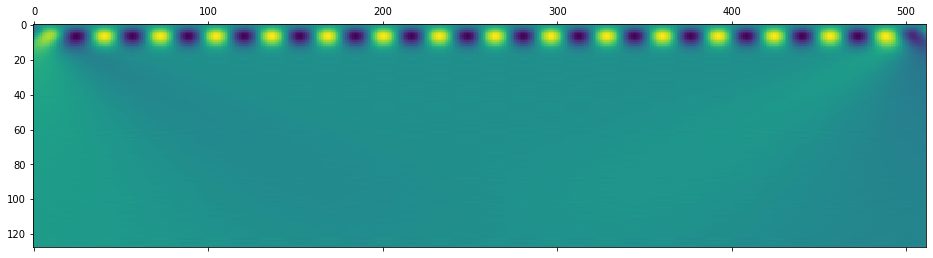

In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(512)
y = np.sin(2*np.pi*x/32)
coef, freqs=pywt.cwt(y,np.arange(1,129),'mexh')
plt.matshow(coef) # doctest: +SKIP
plt.show()

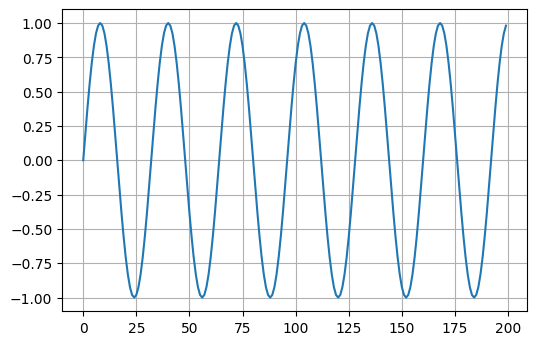

In [2]:
# visualizing signal

plt.figure(num = 1, dpi = 100)
plt.plot(x[:200], y[:200])
plt.grid()

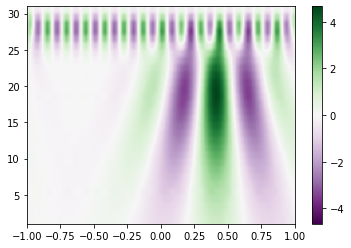

In [3]:
t= np.linspace(-1, 1, 200, endpoint = False)
sig = np.cos(2*np.pi*7 *t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
widths = np.arange(1,31)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent= [-1, 1,1,31], cmap='PRGn', aspect = 'auto',
          vmax = abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.colorbar()
plt.show()

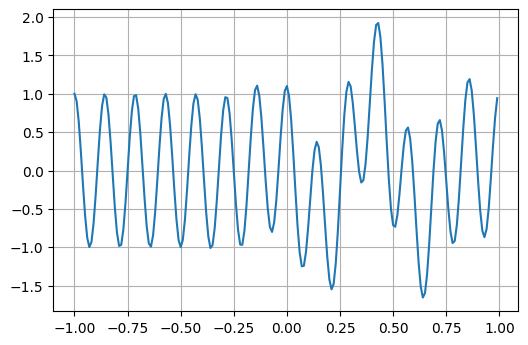

In [4]:
# visualizing signal

plt.figure(num = 1, dpi = 100)
plt.plot(t, sig)
plt.grid()

In [5]:
# sampling rate
fs = 10000000 # 10MHz

# signal length
t = np.arange(0, 0.5, 1 / fs) # s, sampling interval, time array

# generate signal
f1 = 60 # 60Hz
signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

# generate noise signal
np.random.seed(222)
n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
signal_n = 0.2*np.sin(2*np.pi*n1*t)

# total signal
normal_signal = signal_f + signal_n

#  generate noise Arc signal

n3 = 4000000 # 4MHz

np.random.seed(333)
random_mag_Arc = np.random.uniform(0.8, 1.1, 1500)
signal_Arc = random_mag_Arc*np.sin(2*np.pi*n3*t[82500:84000])

signal_Arc # 아크 신호

temp = list(normal_signal) # shoulder 범위만 아크 신호를 더해주기 위해 타입변환

# shoulder 범위만 아크 신호 더하고 shoulder 범위가 아닌 부분은 아크신호를 더하지 않음.

import random
num_s =[] # shoulder 부분 Counting 역할

i,j = 1, 0
s0 = temp[82500*0+1500*0:82500*1+1500*0]
end = (82500*1)+(1500*0)

while (len(s0) != 5000000):
    start = end
    np.random.seed(0)
    num = random.randint(0,2) # 아크 신호를 랜덤하기 더해주기 위한 규칙 생성
    num_s.append(num)
    
    if i == j: # shoulder 범위가 아닐때 그냥 신호 더해줌.
        i += 1
        end = (82500*i)+(1500*j)
        s0 = s0+temp[start:end]
    elif i!=j and num == 2: # shoulder 범위 이면서 num == 2일 경우 아크 신호 더함.
        j += 1
        end = (82500*i)+(1500*j)
        x = temp[start:end] + signal_Arc
        s0 = s0+ list(x) 
    else: # shoulder 범위 이나 num은 2가 아닐 경우 노말 신호만 더해줌.
        j += 1
        end = (82500*i)+(1500*j)
        s0 = s0+ temp[start:end] 
        
sig = np.array(s0) # numpy array type으로 변환

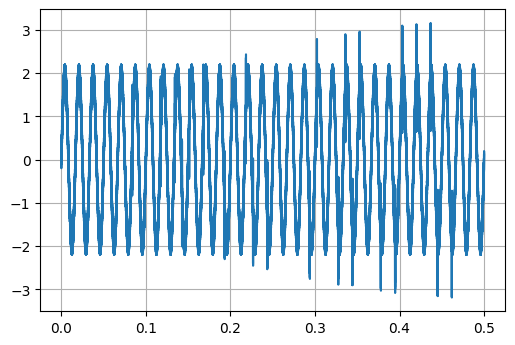

In [6]:
# visualizing signal (노말과 아크 상태를 추가하여 완성된 신호)

plt.figure(num = 1, dpi = 100)
plt.plot(t, sig)
plt.grid()

In [17]:
len(sig)

5000000

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
coef, freqs=pywt.cwt(sig[:1000000], np.arange(1, 500),'mexh')
plt.matshow(coef) # doctest: +SKIP
plt.show()